# Ejercicio 2

## Implementacion de una red neuronal que incorpora una regresión lineal.

### Importamos los datos en un dataframe

In [348]:
import pandas as pd
df = pd.read_csv('insurance.csv')

Breve Análisis del dataset
Mostramos primero algunos valores de nuestro dataset.

Luego los nombres de las columnas de nuestro dataframe

Y para finalizar tambien mostramos el tamaño del dataframe con el que trabajaremos

In [349]:
print("Next the first rows of our dataset are showed: \n")
print(df.head())
print("\nThe colums of our dataset refears to: \n"+str(df.columns) + "\n")
print("the size of the dataframe is: \n " + str(df.shape) + "\n")

Next the first rows of our dataset are showed: 

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

The colums of our dataset refears to: 
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

the size of the dataframe is: 
 (1338, 7)



Con la siguiente linea nos fijamos los tipos de datos que tenemos presentes en cada columna



In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Verificamos la cantidad de datos nulos presentes en nuestro dataframe.

In [351]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Podemos utilizar el método describe para examinar como son los valores que se presentan dentro del dataframe.

In [352]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Breve análisis del dataframe

De ver los valores que devuelve describe podemos darnos cuenta que como los valores minimos de edad no son 0 entonces no hay datos nulos ni ceros que podrían se considerados invalidos en esa columna, de hecho el valor maximo es 64 por lo que podríamos plantear a priori que no es necesario una limpieza de los datos para esa columna.
Luego en el BMI vemos que no existen valores iguales a 0 de hecho el valor minimo es 15 lo cual es un valor posible y el valor maximo es 53 lo cual es un valor muy alto pero al ser el valor mas alto de nuestro dataframe podríamos considerar que esta "bien" y que luego será el diagrama de caja el que nos termine de definir si pertenece o no al grupo de los outlayers, pero en principio uno podría afirmar que el valor es posible en un humano, muy poco saludable pero posible. 
La cantidad de hijos tambien es un parámetro que no presenta valores nulos ni invalidos, debido a que el minimo es cero el cual es un valor perfectamente posible y el valor maximo es 5 lo cual tambien parecería ser un valor esperado, por lo tanto no es necesario realizar ningun tipo de limpieza de datos sobre el mismo.
Los charges que son sobrados por la atencion medica recibida en principio tampoco tienen valores nulos ni ceros lo cual implica que no hay que realizar una limpieza de los datos, pero es de notar que la varianza es elevada, el valor minimo es cercano a 1000 y el valor maximo es cercano a 60.000 lo cual nos invita a pensar en como se podrían limpiar estas métricas, no porque las mismas estén mal tipeadas, sino mas bien porque es probable que nuestro modelo no requiera saber la informacion de atenciones medicas tan bajas de costo o tan altas, lo decidirá en parte el diagrama de caja y lo bien que trabae nuestro modelo.

### Datos que faltan

Existen ciertas columnas que el metodo describe no es capaz de computar debido a que las mismas son columnas que se encuentran descriptas por strings. Para manejar estos datos lo que haremos será ver como estan compuestos los mismos, para eso podemos observar que en la columna "smoker" lo que se indica es si la persona es fumadora o no, esto se indica mediante las palabras "yes" o "no". Por lo tanto lo que podemos hacer es reemplazar todas las apariciones de yes por un 1 y todas las operaciones de no por un 0, esto lo podemos hacer de esta manera ya que es una variable categórica que presenta solo 2 estados posibles por lo que al asignarle un numero a cada una no le añadimos un peso consigo, no implica un ordenamiento de las categorías.

Un caso similar ocurre para la columna sex que se clasifica en male or female.

En cambio para el caso de los barrios ahí tenemos otro problema distinto debido a que ahora es una distribucion categótica pero con varias categorías, por lo que no podemos proceder de la misma manera que antes.

A continuacion se muestra una manera de saber los posibles valores que pueden tomar cada una de estas columnas.

In [353]:
# count occurances a particular column
occur = df.groupby(['smoker']).size()
  
# diplay occurances of a particular column
display(occur)

smoker
no     1064
yes     274
dtype: int64

In [354]:
# count occurances a particular column
occur = df.groupby(['sex']).size()
  
# diplay occurances of a particular column
display(occur)

sex
female    662
male      676
dtype: int64

In [355]:
# count occurances a particular column
occur = df.groupby(['region']).size()
  
# diplay occurances of a particular column
display(occur)

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

Primero resolvamos el problema de la columna smokers: 

Para esto lo que tenemos que hacer es reemplazar todos los yes por 1 y todos los no por 0:

In [356]:
df[['smoker']] = df[['smoker']].replace('yes',1)
df[['smoker']] = df[['smoker']].replace('no',0)

Para comprobar que haya funcionado como esperamos podemos comprobar a continuacion que describe ahora sí contempla la columna smoker y que la misma presenta una gran cantidad de no (0) y poca cantidad de yes (1) (la proporcion esta dada por la media que es aproximadamente 0.205), por lo tanto solo 1/5 de las personas son fumador


In [357]:
df.describe()

,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265
std,14.049960,6.098187,1.205493,0.403694,12110.011237
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,63770.428010


Una vez realizado el estudio de la columna smoker procedemos a continuacion a realizar la limpieza de la columna sex, la mismas se clasifica en male o female, por lo que introduciremos el numero 1 en caso de que se trate de un hombre y el numero 0 si se tratara de una mujer:


In [358]:
df[['sex']] = df[['sex']].replace('male',1)
df[['sex']] = df[['sex']].replace('female',0)

Para comprobar que todo funcionó de manera correcta podemos checkear el resultado de la instruccion describe:


In [359]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


De esta manera podemos notar que al encontrarse la media en torno al valor 0.5 podemos decir que los datos estan balanceados para esa columna.


Para el análisis de la variable en la columna region, como el numero de categorías es pequeño (4), podemos plantear una clasificacion mediante One Hot Encoding en lugar de utilizar embebbing, ya que de esta manera el análisis es simple y la cantidad de variables que agregamos no es tan grande como para necesitar realizar el cambio a embebbing.

A continuación se detalla el procedimiento por el cual se realiza la codificacion mediante One Hot Encoding:

In [360]:
# Get one hot encoding of columns Bs
one_hot = pd.get_dummies(df['region'])
# Drop column B as it is now encoded
df = df.drop('region',axis = 1)
# Join the encoded df
df = df.join(one_hot)

A continuación mostramos como quedó el dataset:


In [361]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Simplemente por una cuestion de orden pondremos la variable que no interesa hallar como la ultima columna del dataframe:

In [362]:
df = df[['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest', 'southeast', 'southwest', 'charges']]

In [363]:
df.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,0,27.900,0,1,0,0,0,1,16884.92400
1,18,1,33.770,1,0,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,0,1,0,4449.46200
3,33,1,22.705,0,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,0,1,0,0,3866.85520


A continuación podemos ampliar la informacion aportada en esta etapa con algunos graficos de histogramas que nos permitan comprobar las distribuciones de edad bmi e hijos de las personas que formaron parte de este estudio.

In [364]:
# Se importan librerías para graficar.
import matplotlib.pyplot as plt
import seaborn as sns

In [365]:
# dfToPlot = df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']]
# fig, axes = plt.subplots(nrows=2, ncols=3)
# for i, col in enumerate(dfToPlot.columns):
#     sns.histplot(dfToPlot[col], ax=axes[int(i/3)][int(i%3)], bins=10)
# axes[0][0].figure.set_size_inches(18, 10)
# fig.suptitle('Histograms', fontsize=20)
# plt.tight_layout()
# plt.show()

### De los gráficos anteriores podemos sacar algunas conclusiones: 

Las edades de los encuestados se encuentran bastante bien niveladas, sin presentar edades con valores muy superiores a otras lo cual es algo bueno para nuestro análisis. El sexo de las personas encuestadas tambien es algo que se enceuntra bien nivelado, presentandose la misma cantidad de personas mujeres que de hombres. La distribución de BMI en las personas se concentra en un valor cercano a 30 y disminuye hacia ambos lados. 

Las probabilidades decrecen al aumentar la cantidad de hijos. 

Existen mas personas no fumadoras que fumadoras en nuestro estudio.

Y por ultimo tambien podemos notar que el numero de pagos disminuye a medida que aumenta el valor del mismo, por lo que son muy pocos frecuentes los casos en los que se requiera un pago cercano al valor 60.000.

Para continuar con el análisis gráfico de la situación, debajo se encuentran los diagramas de cajas para las diferentes variables que conforman nuestro estudio, no se tienen en cuenta para ello las distribuciones con respecto a la region de las personas que se sabe que esta bastante bien nivelada la cantidad de personas que pertenecen a cada zona. Tampoco se grafican los diagramas de caja para las variables binomiales porque no nos aporta ninguna informacion este tipo de gráficos. Por ultimo se aclara que el diagrama para los charges es decir para los gastos de la atención médica se incorporan en un grafico aparte debido a que los valores son mucho mayores a los de las demás categorías.

In [366]:
# f, ax = plt.subplots(figsize=(20, 10))
# plt.ylabel('Variables')
# plt.title("Boxplots")
# ax = sns.boxplot(data = dfToPlot[['age', 'bmi', 'children']], 
#   orient = 'h', 
#   palette = 'Set2')

In [367]:
# f, ax = plt.subplots(figsize=(20, 10))
# plt.ylabel('Variables')
# plt.title("Boxplots")
# ax = sns.boxplot(data = dfToPlot[['charges']], 
#   orient = 'h', 
#   palette = 'Set2')

### Análisis de los boxplots:

De los diagramas de caja podemos notar que existen algunos outliers con respecto a los valores de BMI que se deberá verificar como proceder con ellos (algo que se realiza mas adelante en el análisis) ademas se deberá tomar una decisión respecto de los puntos que conforman el charge es decir el gasto de la atención medica que son outliers, debido a que para esta variable el numero de outliers es muy grande.

Por nuestro conocimiento del problema podemos deducir que la varianza en el precio de una atencion medica puede deberse a diferentes factores. De hecho nosotros mismos tenemos que diseñar la clasificación de manera tal de encontrar dichos factores, pero resulta comprensible que la varianza en el precio sea alta por lo que no consideramos que haga falta retirar dichos outliers de nuestro sistema, aunque de todas maneras si resulta indispensable considerar que existen debido a que la varianza en el pago es grande.

### Grafico de correlacion de variables

A continuación se muestran los diagramas de correlacion de variables que nos permiten tener una idea de la relacion entre las mismas.

In [368]:
# #print a pairplot to check the relationships between strongly correlated features
# pp = sns.pairplot(df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']])
# pp = pp.map_lower(sns.regplot)
# pp = pp.map_upper(sns.kdeplot);

### Análisis del gráfico de correlacion de variables:

Del gráfico anterior se pueden ver datos muy relevantes, si analizamos la fila correspondiente a la edad, veremos que no presenta correlacion frente al sexo lo cual nos habla de un estudio en principio bien realizado, tampoco varia demaisado con respecto al valor del bmi ni de la cantidad de hijos y la distribucion de edad para fumadores y no fumadores parece ser en principio muy parecida. Pero de todas maneras se puede ver de manera clara que existe una correlacion entre la edad de la persona y el charge se puede ver como los datos se ubican de forma tal que generan una pendiente notoria.

De analizar la fila para sex podemos notar que la correlacion de sexo con bmi es muy pequeña, existe una distribucion parecida para las personas de sexo masculino o femenino, presentandose sí los valores de mayor BMI en hombres. 

Con respecto a la realcion entre seo y cantidad de hijos las distribuciones son muy similares y lo mismo ocurre con los fumadores, presentandose una ligera mayoria en los hombres fumadores respecto de las mujeres fumadoras, pero no es tan grande la diferencia. El sexo influye pero poco en los gastos de salud, presentandose un aumento del costo en el caso de los hombres.

Con respecto a la fila de bmi podemos notar que existe una correlacion entre el bmi y el costo de salud medica, debido a que valores mayores de BMI tienden a presentar valores mayores de costos médicos.

luego respecto de la cantidad de hijos se puede apreciar que las personas con mayor cantidad de hijos presentan valores menores de gastos medicos, algo que puede ser entendido debido a que estas personas quiza deban destinar parte de su dinero a sus familias en lugar de destinarlo a gastos medicos.

Por ultimo la relacion entre los costos y si la persona es o no fumadora es muy grande, la correlacion existe de manera muy notoria en este caso, por lo que se ha de tener en cuenta para el análisis.

### Matriz de correlacion:

Por último y para finalizar con el análisis de la situción se presenta a continuación una matriz que muestra la correlacion de las variables involucradas:

In [369]:
# correlation = df.corr()
# sns.set(rc={'figure.figsize':(12,8)})
# sns.heatmap(correlation,annot = True, linewidth=1, linecolor='w', cmap="Reds")

### Análisis de la matriz de correlacion

Podemos ver en la matriz de correlacion que se encuentra arriba que los valores de correlacion se corresponden a las deducciónes que pudimos realizar sobre el modelo en base a los datos considerados de a pares en los diagramas de puntos. De esta manera podemos apreciar la fuerte correlacion que existe entre el precio pagado y el hecho de que la persona sea o no fumadora ademas de la influencia del bmi y la edad en el dinero que se destina a la salud. 

Una correalcion interesante que no podiamos ver en los graficos anteriores y ahora sí es la que existe entre el BMI y la region en la que viven las personas, principalmente para el caso de la region southeast en la cual la correlacion es muy fuerte respecto del BMI, este dato tal vez no es tan relevante para nuestro caso, pero podría servirnos si tuvieramos que postular valores si hubiera datos faltantes introducidos por el usuario.

De esta manera hemos finalizado la etapa de limpieza y ordenamiento de los datos que nos permitirá a partir de ahora trabaja de manera mas estructurada con los mismos.






## Primero separamos train de test

In [370]:
df_train = df.sample(frac=0.8,random_state=0)
df_test = df.drop(df_train.index)

## Declaramos la clase

Dentro esta contendrá los metodos que necesitamos para correr nuestro modelo.

In [371]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [372]:
# train_stats = df_train.describe()
# train_stats = train_stats.transpose()
# print(train_stats['mean'])
# print(train_stats)

In [373]:
class CostPredictor:
    def __init__(self, df_train, df_validation, Epochs, train_labels, validation_labels, learning_rate, beta_1, beta_2):
        """CostPredictor

        This is a class contains the most part of the methods needed for the cost predictor

        """
        self.model = self.build_model(df_train, learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2)
        self.EPOCHS = Epochs

        self.train_stats = df_train.describe()
        self.train_stats = self.train_stats.transpose()

        self.df_train_norm = self.norm(df_train)
        self.df_validation_norm = self.norm(df_validation)
        self.train_labels = train_labels
        self.validation_labels = validation_labels


    def norm(self, x):
        return (x - self.train_stats['mean']) / self.train_stats['std']

    def train_nn(self, early_stopping = False):

        if(early_stopping == True):
            early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
            self.history = self.model.fit(self.df_train_norm, self.train_labels, epochs=self.EPOCHS,
                    validation_data = (self.df_validation_norm,self.validation_labels), verbose=0, callbacks=[PrintDot(self.EPOCHS), early_stopping_callback])
        else:
            self.history = self.model.fit(self.df_train_norm, self.train_labels, epochs=self.EPOCHS,
                    validation_data = (self.df_validation_norm,self.validation_labels), verbose=0, callbacks=[PrintDot(self.EPOCHS)])

    def build_model(self, df_train, learning_rate, beta_1, beta_2):
        initializer = tf.keras.initializers.GlorotNormal(seed=7) # We use an initializer to start always in the same position (because we are using the same seed)

        model = keras.Sequential([
        layers.Dense(2, activation='relu', input_shape=[len(df_train.keys())], kernel_initializer=initializer, bias_initializer=initializer),
        layers.Dense(1, kernel_initializer=initializer)
        ])

        optimizer = tf.keras.optimizers.Adam(
        learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=1e-07,
        name='Adam'
        )

        model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])
        return model
    
    def get_summary(self):
        self.model.summary()
    
    def get_hist(self):
        hist = pd.DataFrame(self.history.history)
        hist['epoch'] = self.history.epoch
        hist.tail()

    # def validation_split(self, df_validation_norm):
    #     df_validation_norm['charges'] = self.validation_labels

    #     df_validation_norm_values = df_validation_norm.values

    #     self.df_validation_x = df_validation_norm_values[:,:-1]
    #     self.df_validation_y = df_validation_norm_values[:, -1].reshape(self.df_validation_x.shape[0], 1)


    def create_history(self):
        self.history = model.fit(df_train_norm, train_labels, epochs=EPOCHS,
                    validation_data = (self.df_validation_x,self.df_validation_y), verbose=0, callbacks=[PrintDot(self.EPOCHS)])

    def plot_history(self):
        hist = pd.DataFrame(self.history.history)
        hist['epoch'] = self.history.epoch

        plt.figure()
        plt.xlabel('Epoch')
        plt.ylabel('Mean Abs Error [MPG]')
        plt.plot(hist['epoch'], hist['mae'], label='Train Error')
        plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
        plt.legend()

        plt.figure()
        plt.xlabel('Epoch')
        plt.ylabel('Mean Square Error [$MPG^2$]')
        plt.plot(hist['epoch'], hist['mse'], label='Train Error')
        plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
        plt.legend()
        plt.show()

class PrintDot(keras.callbacks.Callback):
    def __init__(self, EPOCHS):
        self.EPOCHS = EPOCHS

    def on_epoch_end(self, epoch, logs):
        self.printProgressBar(float(epoch), int(self.EPOCHS),suffix = 'Complete', length = 50)
    
    def printProgressBar (self, iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = ""):
        """
        Call in a loop to create terminal progress bar
        @params:
            iteration   - Required  : current iteration (Int)
            total       - Required  : total iterations (Int)
            prefix      - Optional  : prefix string (Str)
            suffix      - Optional  : suffix string (Str)
            decimals    - Optional  : positive number of decimals in percent complete (Int)
            length      - Optional  : character length of bar (Int)
            fill        - Optional  : bar fill character (Str)
            printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
        """
        percent = ("{0:." + str(decimals) + "f}").format(100 * (float(iteration) / float(total)))
        filledLength = int(length * iteration // total)
        bar = fill * filledLength + '-' * (length - filledLength)
        print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
        # Print New Line on Complete
        if iteration == total-1: 
            print(f'\r Trained 🧠🏃🏻‍♂️')

## Ahora definimos el K-Folder (cross-validation)

Decidimos utilizar kfolding debido a que tenemos un set de datos demasiado pequeño, de esta manera utilizando kfolding podemos disminuir la varianza de la metrica. 

De esta manera lo que haremos será definir los hiperparámetros fuera del Kfolding y cada vez que corramos nuestro modelo este performará dentro del Kfolding para comprobar al final de las iteraciones cual métrica obtengo en base a promediar la metrica de cada fold.

Luego nuestro modelo sera una combinacion promedio de la salida de cada modelo. Vale recordar aqui que nos decidimos por este enfoque principalmente por la falta de datos y debido a que en este dataset realizar data aumentation seria complejo esta opcion es una opcion viable con sus correspondientes (y discutibles) pros y contras.

In [374]:
from sklearn.model_selection import KFold
import statistics

def k_folding(df, EPOCHS, learning_rate, beta_1=0.9, beta_2 = 0.999, early_stopping = False):
    """
    Función que dado un dataframe realiza un k-folding con k=5.
    Recibe:
        Dataframe
    Devuelve:
        none
    """
    kf = KFold(n_splits = 5, random_state=7 , shuffle=True)
    sub_sets = kf.split(df)
    mse_min_values = []
    mae_min_values = []
    for train_index, validation_index in sub_sets:
        # Here we split the data 
        train_df = df.iloc[train_index]
        validation_df = df.iloc[validation_index]
        # After we split the train_df in target_train and no_charges_train dataframes

        df_train_target = train_df['charges']
        df_train_no_charges = train_df
        df_train_no_charges.pop('charges')

        df_validation_target = validation_df['charges']
        df_validation_no_charges = validation_df
        df_validation_no_charges.pop('charges')

        predictor = CostPredictor(df_train_no_charges, df_validation_no_charges, EPOCHS, df_train_target, df_validation_target, learning_rate, beta_1, beta_2)
        predictor.get_summary()
        # predictor.validation_split(df_validation_norm)
        predictor.train_nn(early_stopping = early_stopping)
        predictor.get_hist()
        predictor.plot_history()
        print("The MSE error of this iteration (in validation) is: " + str(min(predictor.history.history['val_mse'])))
        print("The MAE error of this iteration (in validation) is: " + str(min(predictor.history.history['val_mae'])))
        mse_min_values.append(min(predictor.history.history['val_mse']))
        mae_min_values.append(min(predictor.history.history['val_mae']))
    print("-"*100)
    print("The mean MSE was: ", statistics.mean(mse_min_values))
    print("The mean MAE was: ", statistics.mean(mae_min_values))

## Hiperparámetros

Ahora una vez que definimos nuestro modelo y la forma en la que lo usaremos estamos en condiciones de realizar las consideraciones pertinentes a los Hiperparámetros, en una situacion normal podríamos mejorar los Hiperparámetros con herramientas como tuner (de keras tensorflow) u otras bibliotecas similares, pero el problema aquí es que tenemos muy pocos datos, por lo que nos vemos obligados a utilizar K-folding, lo que complejiza mucho el uso de estas herramientas, por lo que decidimos hacer un barrido de las opciones de Hiperparámetros posibles para asi quedarnos con la combinación que mejor funciona para nuestro modelo.

Comenzaremos con la cantidad de EPOCHS:

A continuación se muestra el modelo funcionando para 100 epochs

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 2)                 20        
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 3         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
 Trained 🧠🏃🏻‍♂️


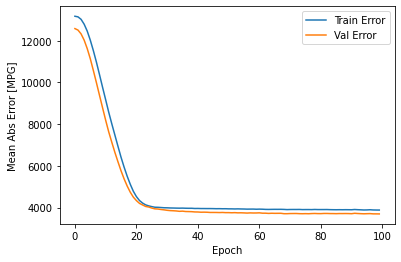

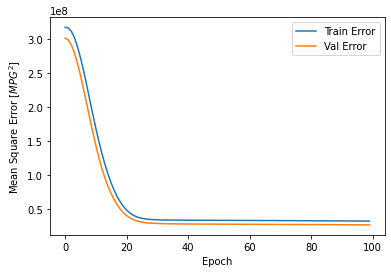

The MSE error of this iteration (in validation) is: 26434706.0
The MAE error of this iteration (in validation) is: 3698.04052734375
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 2)                 20        
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 3         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
 Trained 🧠🏃🏻‍♂️


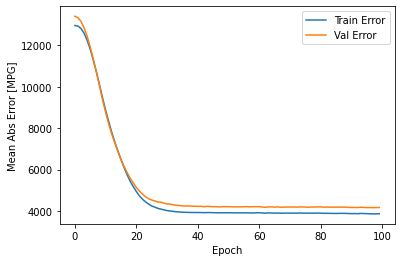

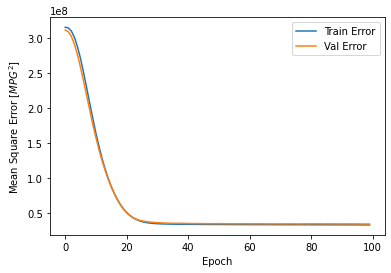

The MSE error of this iteration (in validation) is: 34152344.0
The MAE error of this iteration (in validation) is: 4157.47119140625
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 2)                 20        
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 3         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
 Trained 🧠🏃🏻‍♂️


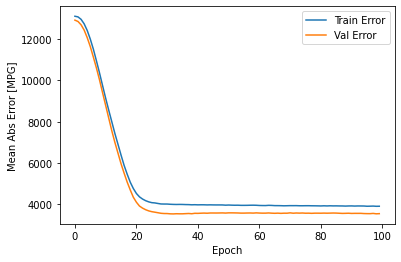

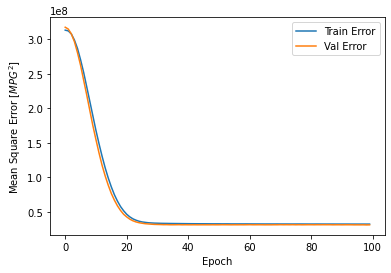

The MSE error of this iteration (in validation) is: 30885816.0
The MAE error of this iteration (in validation) is: 3545.193115234375
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 2)                 20        
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 3         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
 Trained 🧠🏃🏻‍♂️


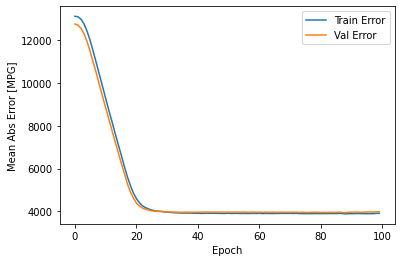

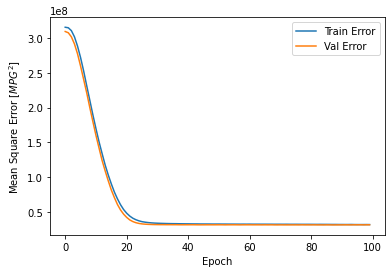

The MSE error of this iteration (in validation) is: 31442116.0
The MAE error of this iteration (in validation) is: 3935.7783203125
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 2)                 20        
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 3         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
 Trained 🧠🏃🏻‍♂️


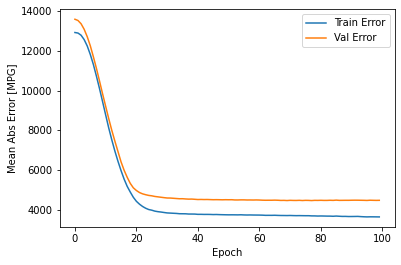

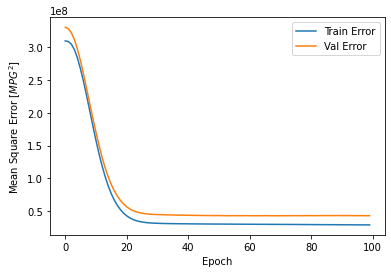

The MSE error of this iteration (in validation) is: 42645552.0
The MAE error of this iteration (in validation) is: 4458.873046875
----------------------------------------------------------------------------------------------------
The mean MSE was:  33112106.8
The mean MAE was:  3959.071240234375


In [377]:
k_folding(df_train, EPOCHS = 100, learning_rate = 0.1)

Podemos ver de los gráficos que nuestro modelo funciona como esperaríamos para esa relacion entre el numero de epochs y el valor de learing rate, por lo que podemos mantener este valor de epochs en tanto y en cuanto el learning rate nos lo permita.

Para el análisis del learning rate podemos asumir que el valor elegido en la primera prueba (0.1) tiene un valor lo suficientemente grande como para que nuestro modelo llegue al valor minimo de mse y mae debido  a que las curvas se estabilizan correctamente en las cercanias del epoch 20.

Comprobemos ahora qué sucedería si utilizaramos un learning rate menor:

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 2)                 20        
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 3         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
 Trained 🧠🏃🏻‍♂️


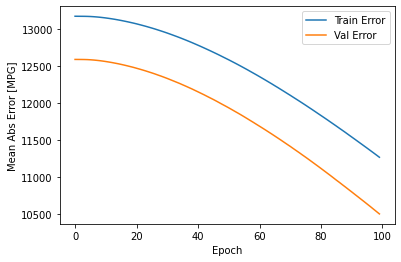

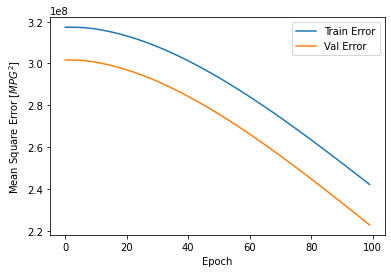

The MSE error of this iteration (in validation) is: 222771712.0
The MAE error of this iteration (in validation) is: 10498.099609375
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 2)                 20        
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 3         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
 Trained 🧠🏃🏻‍♂️


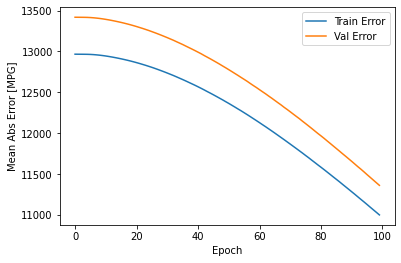

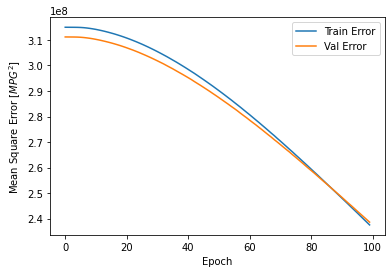

The MSE error of this iteration (in validation) is: 238626880.0
The MAE error of this iteration (in validation) is: 11359.7314453125
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 2)                 20        
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 3         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
 Trained 🧠🏃🏻‍♂️


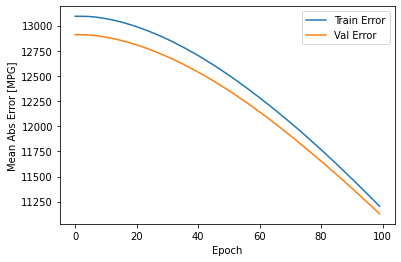

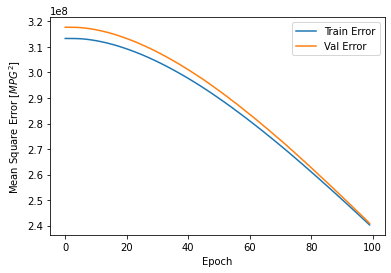

The MSE error of this iteration (in validation) is: 240902848.0
The MAE error of this iteration (in validation) is: 11128.1533203125
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 2)                 20        
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 3         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
 Trained 🧠🏃🏻‍♂️


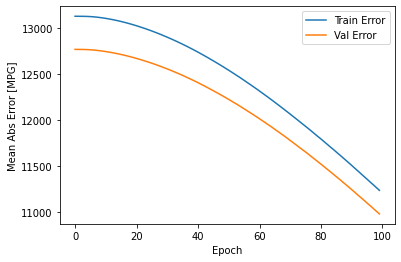

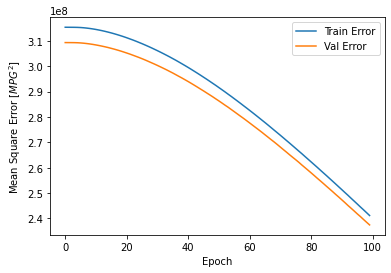

The MSE error of this iteration (in validation) is: 237418208.0
The MAE error of this iteration (in validation) is: 10983.236328125
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 2)                 20        
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 3         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
 Trained 🧠🏃🏻‍♂️


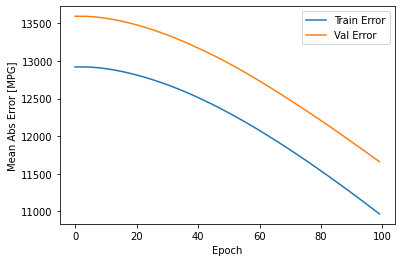

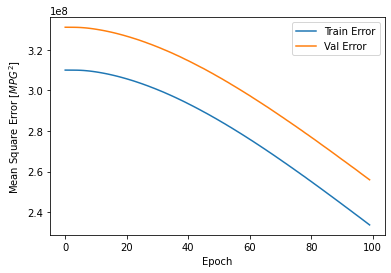

The MSE error of this iteration (in validation) is: 255974480.0
The MAE error of this iteration (in validation) is: 11662.1015625
----------------------------------------------------------------------------------------------------
The mean MSE was:  239138825.6
The mean MAE was:  11126.264453125


In [378]:
k_folding(df_train, EPOCHS = 100, learning_rate = 0.01)

Podemos ver de las curvas que los valores no se estabilizan correctamente para valores tan chicos de learning rate, por lo tanto es necesario en este caso aumentar el numero de epochs:

In [381]:
k_folding(df_train, EPOCHS = 700, learning_rate = 0.01)

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 2)                 20        
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 3         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________
